<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [19]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [20]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [21]:
df["species"] = df["species"].str.lower().str.strip() # cambia todo a minúscula y quita espacios
df["species"] = df["species"].fillna("default") # cambia los NaN por "default"
especies = df["species"].value_counts()
# especies.index[0] entrega el nombre de la flor
print(especies)
"Son 3 tipos de elementos"


setosa        50
virginica     50
versicolor    49
default        1
Name: species, dtype: int64


'Son 3 tipos de elementos'

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

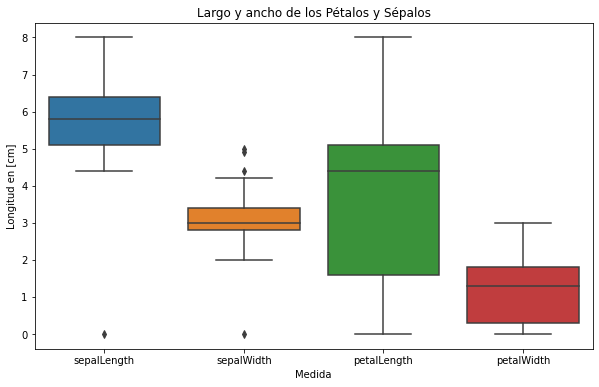

In [22]:
df = df.fillna(0)
flores = df.drop(['species'],axis=1) # elimina variables que no se utilizan
plt.figure(figsize=(10, 6))
sns.boxplot(data=flores)
plt.title("Largo y ancho de los Pétalos y Sépalos") # agregar titulo
plt.xlabel('Medida') # nombre eje x
plt.ylabel('Longitud en [cm]') # nombre eje y
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [23]:
# Se realiza un mask para asignar condiciones
mask_sepalLength_inf = df['sepalLength']>=4.0
mask_sepalLength_sup = df['sepalLength']<=7.0
mask_sepalLength = mask_sepalLength_inf & mask_sepalLength_sup

mask_sepalWidth_inf = df['sepalWidth']>=2.0
mask_sepalWidth_sup = df['sepalWidth']<=4.5
mask_sepalWidth = mask_sepalWidth_inf & mask_sepalWidth_sup

mask_petalLength_inf = df['petalLength']>=1.0
mask_petalLength_sup = df['petalLength']<=7.0
mask_petalLength = mask_petalLength_inf & mask_petalLength_sup

mask_petalWidth_inf = df['petalWidth']>=0.1
mask_petalWidth_sup = df['petalWidth']<=2.5
mask_petalWidth = mask_petalWidth_inf & mask_petalWidth_sup


#Agregar columna
df["label"] = mask_sepalLength & mask_sepalWidth & mask_petalLength & mask_petalWidth
df



,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

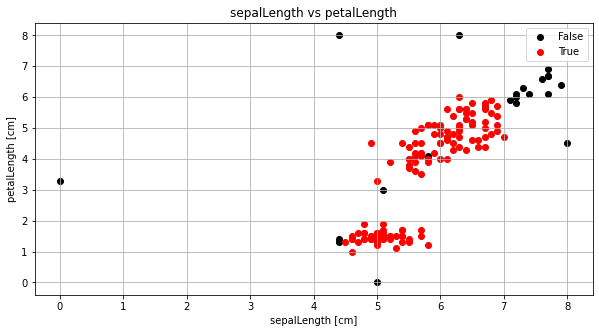

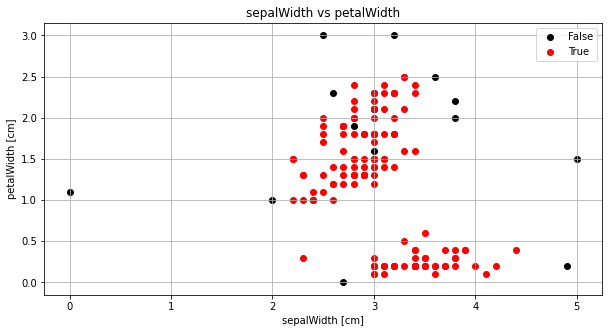

'Se observa en los gráficos que una gran cantidad de puntos son Falsos, es decir, no tienen las condiciones para cumplir con las longitudes mínimas y máximas para el ancho y largo del sépalo y pétalo de cada especie. Es necesario reevaluar si se obtuvo correctamente el nombre de la especie. Por otro lado de los gráficos se observa que el largo es mayor que el ancho, en general, para cualquier especie'

In [58]:
grupos = df.groupby(['label'])
condicion = []
sl = [] # sepalLength
pl = [] # petalLength
sw = [] # sepalWidth
pw = [] # petalWidth
for vf,gp in grupos: # obtiene la información de los grupos
  condicion.append(vf)
  sl.append(gp['sepalLength'])
  pl.append(gp['petalLength'])
  sw.append(gp['sepalWidth'])
  pw.append(gp['petalWidth'])

# Gráficos 

fig = plt.figure(figsize=(10, 5)) 
plt.scatter(sl[0], pl[0],color="black",linewidth=1)
plt.scatter(sl[1], pl[1],color="red",linewidth=1)
plt.title("sepalLength vs petalLength") # agregar titulo
plt.xlabel('sepalLength [cm]') # nombre eje x
plt.ylabel('petalLength [cm]') # nombre eje y
plt.grid()
plt.legend(condicion)
plt.show()

fig = plt.figure(figsize=(10, 5)) 
plt.scatter(sw[0], pw[0],color="black",linewidth=1)
plt.scatter(sw[1], pw[1],color="red",linewidth=1)
plt.title("sepalWidth vs petalWidth") # agregar titulo
plt.xlabel('sepalWidth [cm]') # nombre eje x
plt.ylabel('petalWidth [cm]') # nombre eje y
plt.grid()
plt.legend(condicion)
plt.show()

"Se observa en los gráficos que una gran cantidad de puntos son Falsos, es decir, no tienen las condiciones para cumplir con las longitudes mínimas y máximas para el ancho y largo del sépalo y pétalo de cada especie. Es necesario reevaluar si se obtuvo correctamente el nombre de la especie. Por otro lado de los gráficos se observa que el largo es mayor que el ancho, en general, para cualquier especie"

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

{'virginica': 'blue', 'versicolor': 'green', 'default': 'black', 'setosa': 'red'}


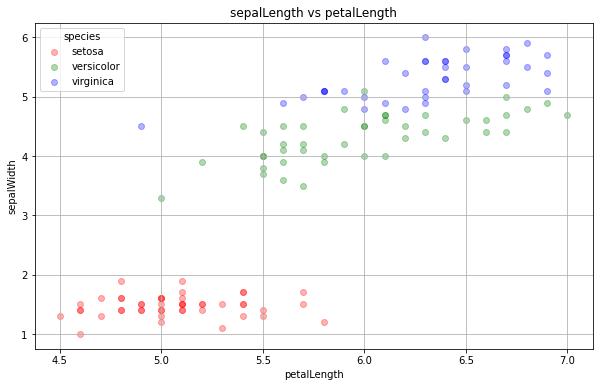

In [51]:
# Supuesto: datos válidos -> label = True
# Los datos ya se encuentran filtrados en el punto anterior

flores = df[df['label'] == True] # filtra los datos válidos
color_map = dict(zip(flores["species"].unique(), 
                     ["blue", "green", "black","red"]))
print(color_map)
plt.figure(figsize=(10, 6))

for species, group in flores.groupby("species"):
  if species != "default":# este condicionante es para no graficar la especie "default"
      plt.scatter(group["sepalLength"], 
                  group["petalLength"],
                  color=color_map[species],
                  alpha=0.3,
                  edgecolor=None,
                  label=species,
                )
plt.legend(frameon=True, title="species")
plt.title("sepalLength vs petalLength") # agregar titulo
plt.xlabel("petalLength")
plt.ylabel("sepalWidth")
plt.grid()
plt.show()
